In [1]:
import keras
from keras.api import layers
from keras.api.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

Libraries Loaded Successfully


In [11]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SLICE = 10
INPUT_SHAPE = (IMAGE_SIZE-2*SLICE, IMAGE_SIZE-2*SLICE)
CLASSES = 43

EPOCHS = 20

Loading Files and Dataset ...
Found Categories : ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 44, 44)
X-Test : (860, 44, 44)
Y-Train : (3439,)
Y-Test : (860,)


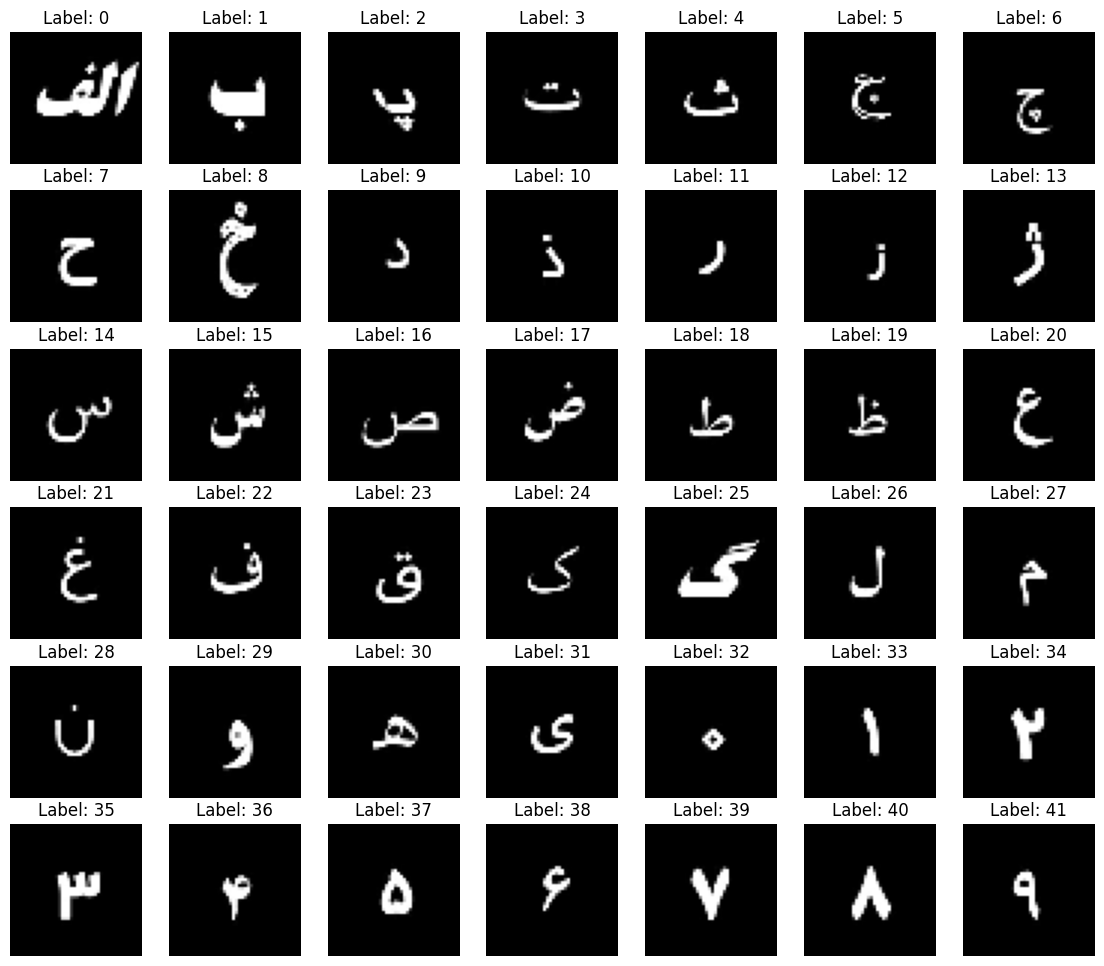

In [12]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, slice=SLICE, padding=0, invert=True)
X, y = dataloader.load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [14]:
model_1 = Sequential(name='Model-1')

model_1.add(layers.Input(shape=INPUT_SHAPE))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=2048, activation='relu', use_bias=True, name='Dense_1'))
model_1.add(layers.Dense(units=1024, activation='relu', use_bias=True, name='Dense_2'))
model_1.add(layers.Dense(units=512, activation='relu', use_bias=True, name='Dense_3'))
model_1.add(layers.Dense(units=256, activation='relu', use_bias=True, name='Dense_4'))
model_1.add(layers.Dense(units=128, activation='relu', use_bias=True, name='Dense_5'))
model_1.add(layers.Dense(units=64, activation='relu', use_bias=True, name='Dense_6'))
model_1.add(layers.Dense(units=CLASSES, activation='softmax', use_bias=True, name='Dense_7'))

model_1.summary()

Model: "Model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 2048)           │     3,966,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_7 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,765,227 (25.81 MB)

 Trainable params: 6,765,227 (25.81 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_1.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test))

history_df_1 = pd.DataFrame({
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})

# model_1.save(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{history.history['val_accuracy'][-1]:.4f}_val_acc.keras")

display(history_df_1)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0244 - loss: 3.7469 - val_accuracy: 0.0360 - val_loss: 3.3819
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0744 - loss: 3.1814 - val_accuracy: 0.1070 - val_loss: 2.7632
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1223 - loss: 2.6414 - val_accuracy: 0.1174 - val_loss: 2.5375
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1526 - loss: 2.4581 - val_accuracy: 0.1942 - val_loss: 2.3264
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2293 - loss: 2.1521 - val_accuracy: 0.3012 - val_loss: 1.8936
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3685 - loss: 1.7287 - val_accuracy: 0.4209 - val_loss: 1.6176
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4642 - loss: 1.4438 - val_accuracy: 0.5023 - val_loss: 1.3738
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5569 - loss: 1.2322 - val_accu

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,0.027334,0.036047,3.680988,3.381913
1,0.091596,0.106977,3.018077,2.763224
2,0.138703,0.117442,2.571355,2.537481
3,0.175923,0.194186,2.373767,2.326447
4,0.275662,0.301163,2.022899,1.893608
5,0.395464,0.420930,1.665345,1.617645
6,0.482408,0.502326,1.401847,1.373752
7,0.545217,0.508140,1.237227,1.388056
8,0.566444,0.582558,1.129647,1.207845
9,0.612387,0.611628,1.017328,1.114902


In [5]:
model_2 = Sequential(name='Model_2')

model_2.add(layers.Input(shape=(1, INPUT_SHAPE[0], INPUT_SHAPE[1])))


model_2.add(layers.Conv2D(filters=4, kernel_size=7, strides=1, data_format='channels_first', use_bias=True, name='Convolutional_1'))
model_2.add(layers.BatchNormalization(name='Batch_Normalization_1'))
model_2.add(layers.MaxPooling2D(strides=2, data_format='channels_first', name='Max_Pooling_1'))

model_2.add(layers.Dropout(0.25 , name='Drop_out_1'))

model_2.add(layers.Conv2D(filters=8, kernel_size=6, strides=1, data_format='channels_first', use_bias=True, name='Convolutional_2'))
model_2.add(layers.BatchNormalization(name='Batch_Normalization_2'))
model_2.add(layers.MaxPooling2D(strides=2, data_format='channels_first', name='Max_Pooling_2'))

model_2.add(layers.Dropout(0.25 , name='Drop_out_2'))

model_2.add(layers.Flatten(data_format='channels_first', name='Flattening'))

model_2.add(layers.Dense(512, activation='relu', use_bias=True, name='Fully_Connected_1'))
model_2.add(layers.Dense(256, activation='relu', use_bias=True, name='Fully_Connected_2'))
model_2.add(layers.Dense(CLASSES, activation='softmax', use_bias=True, name='Fully_Connected_3'))

model_2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convolutional_1 (Conv2D)        │ (None, 4, 48, 48)      │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Normalization_1           │ (None, 4, 48, 48)      │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_1 (MaxPooling2D)    │ (None, 4, 24, 24)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_out_1 (Dropout)            │ (None, 4, 24, 24)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convolutional_2 (Conv2D)        │ (None, 8, 19, 19)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Normalization_2           │ (None, 8, 19, 19)      │            76 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_2 (MaxPooling2D)    │ (None, 8, 9, 9)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_out_2 (Dropout)            │ (None, 8, 9, 9)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flattening (Flatten)            │ (None, 648)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_1 (Dense)       │ (None, 512)            │       332,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_2 (Dense)       │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_3 (Dense)       │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,295 (1.82 MB)

 Trainable params: 476,161 (1.82 MB)

 Non-trainable params: 134 (536.00 B)

In [17]:
model_2.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history_2 = model_2.fit(X_train.reshape(3439, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_train, epochs=EPOCHS, validation_data=(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_test))

history_df_2 = pd.DataFrame({
    'Training Accuracy': history_2.history['accuracy'],
    'Validation Accuracy': history_2.history['val_accuracy'],
    'Training Loss': history_2.history['loss'],
    'Validation Loss': history_2.history['val_loss']
})

# model_1.save(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{history.history['val_accuracy'][-1]:.4f}_val_acc.keras")

display(history_df_2)

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "Batch_Normalization_1" is incompatible with the layer: expected axis -1 of input shape to have value 48, but received input with shape (None, 4, 38, 38)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1, 44, 44), dtype=float32)
  • training=True
  • mask=None

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


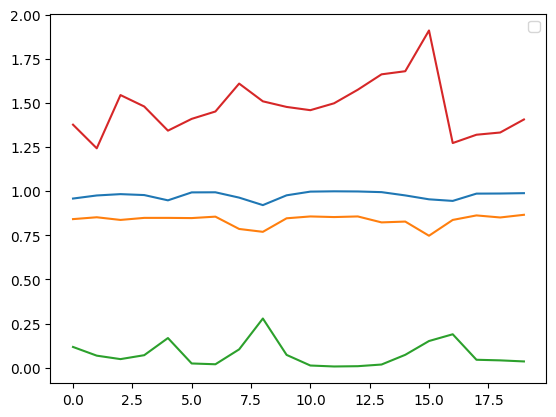

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8711 - loss: 1.5534
Model 1 Test Accuracy: 0.8663
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


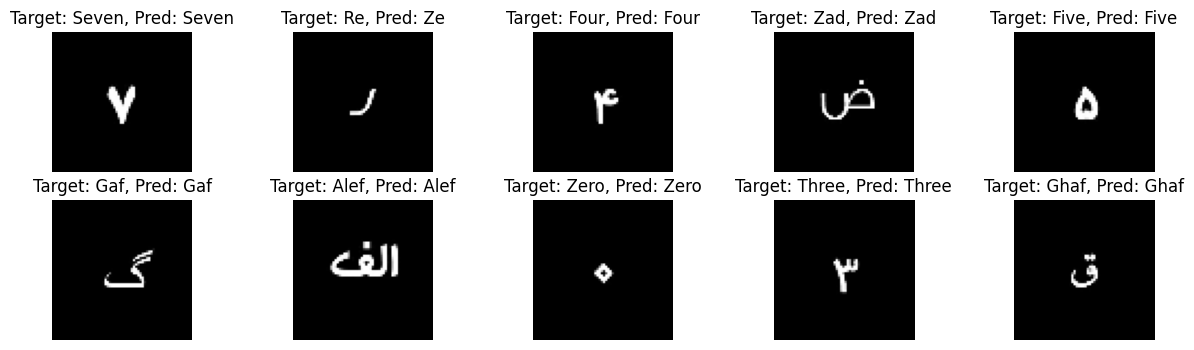

In [47]:
from keras.api.models import load_model

plt.plot(history_df_1)
plt.legend()
plt.show()


test_loss_1, test_acc_1 = model_1.evaluate(X_test, y_test)
print(f'Model 1 Test Accuracy: {test_acc_1:.4f}')

loaded_model = load_model(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{test_acc_1:.4f}_val_acc.keras")

predictions = loaded_model.predict(X_test)

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions[i])]}')
    plt.axis('off')
    counter+=1
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


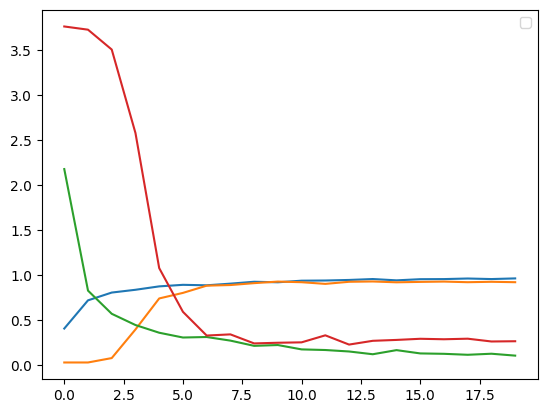

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9302 - loss: 0.2671
Model 2 Test Accuracy: 0.9209
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


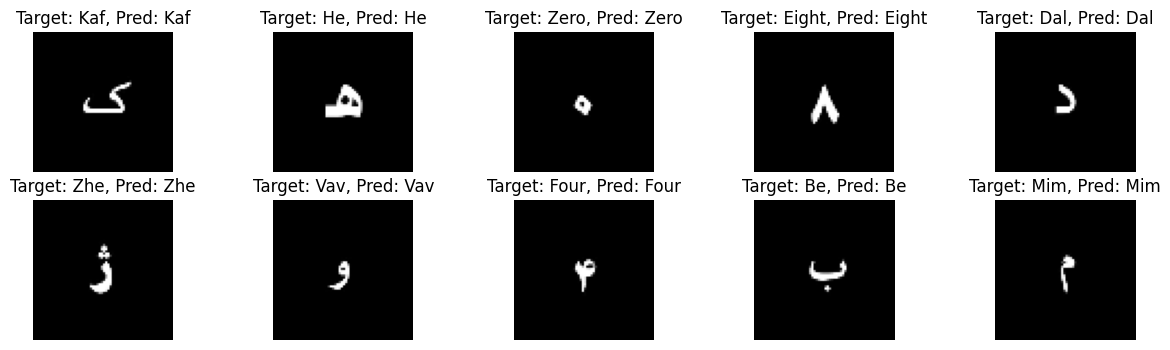

In [25]:
from keras.api.models import load_model

plt.plot(history_df_2)
plt.legend()
plt.show()


test_loss_2, test_acc_2 = model_2.evaluate(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_test)
print(f'Model 2 Test Accuracy: {test_acc_2:.4f}')

# loaded_model = load_model(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{test_acc_2:.4f}_val_acc.keras")

predictions_2 = model_2.predict(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]))

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions_2[i])]}')
    plt.axis('off')
    counter+=1
plt.show()

In [30]:
from keras.api.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 7  
n_cols = 7  

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

axes = axes.flatten()

for i in range(CLASSES):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


NameError: name 'predictions' is not defined

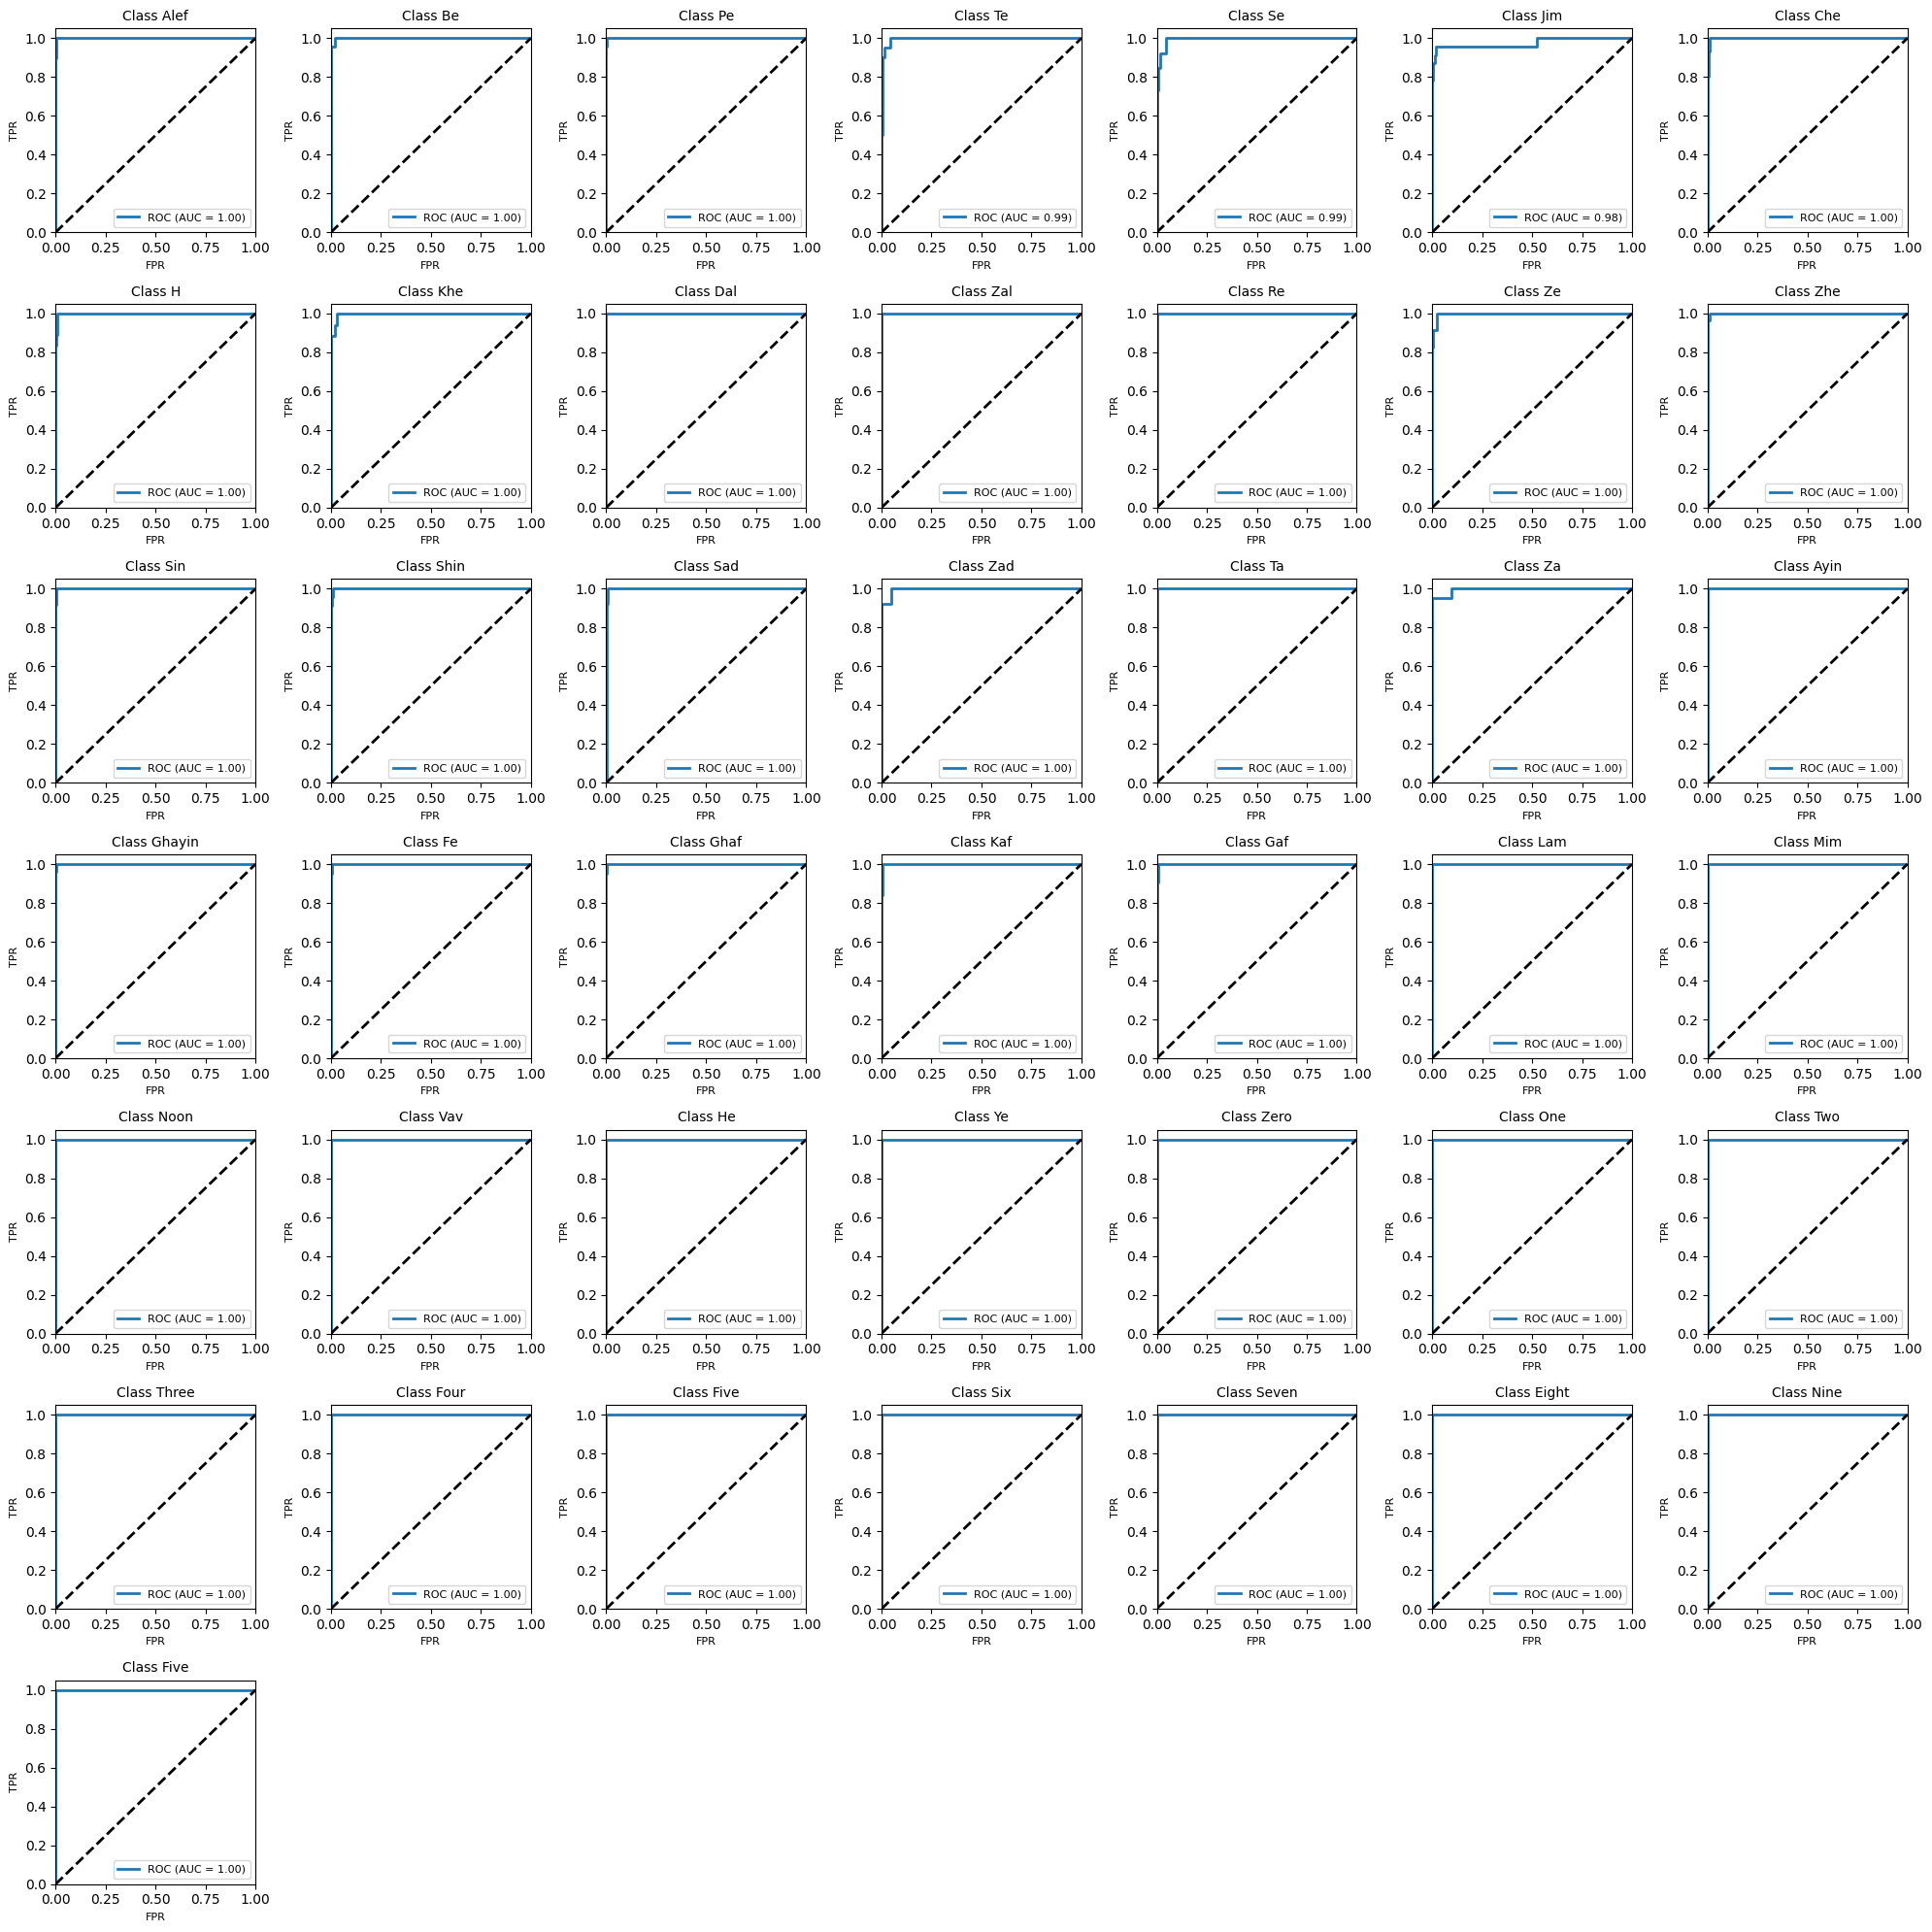

In [29]:
from keras.api.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 7  
n_cols = 7  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

axes = axes.flatten()

for i in range(CLASSES):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


(64, 64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
(1, 43)


(-0.5, 63.5, 63.5, -0.5)

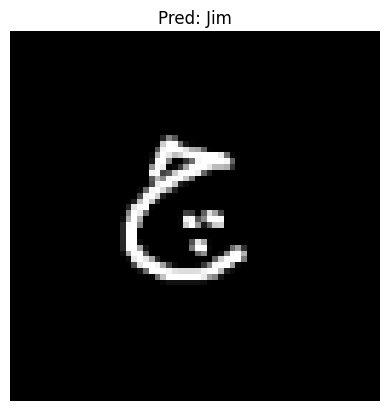

In [57]:
import os
import cv2 as cv


image_path = os.path.join(REAL_DATA, 'jim2.png')

image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

print(image.shape)

predictions_test = model_2.predict(image.reshape(1,1,64,64))

print(predictions_test.shape)

plt.imshow(image, cmap='gray')
plt.title(f'Pred: {LABELS[np.argmax(predictions_test)]}')
plt.axis('off')